<a href="https://colab.research.google.com/github/JuanCaG8a/Repositorio-Metodos-1/blob/main/Tarea_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import sympy as sym

3. 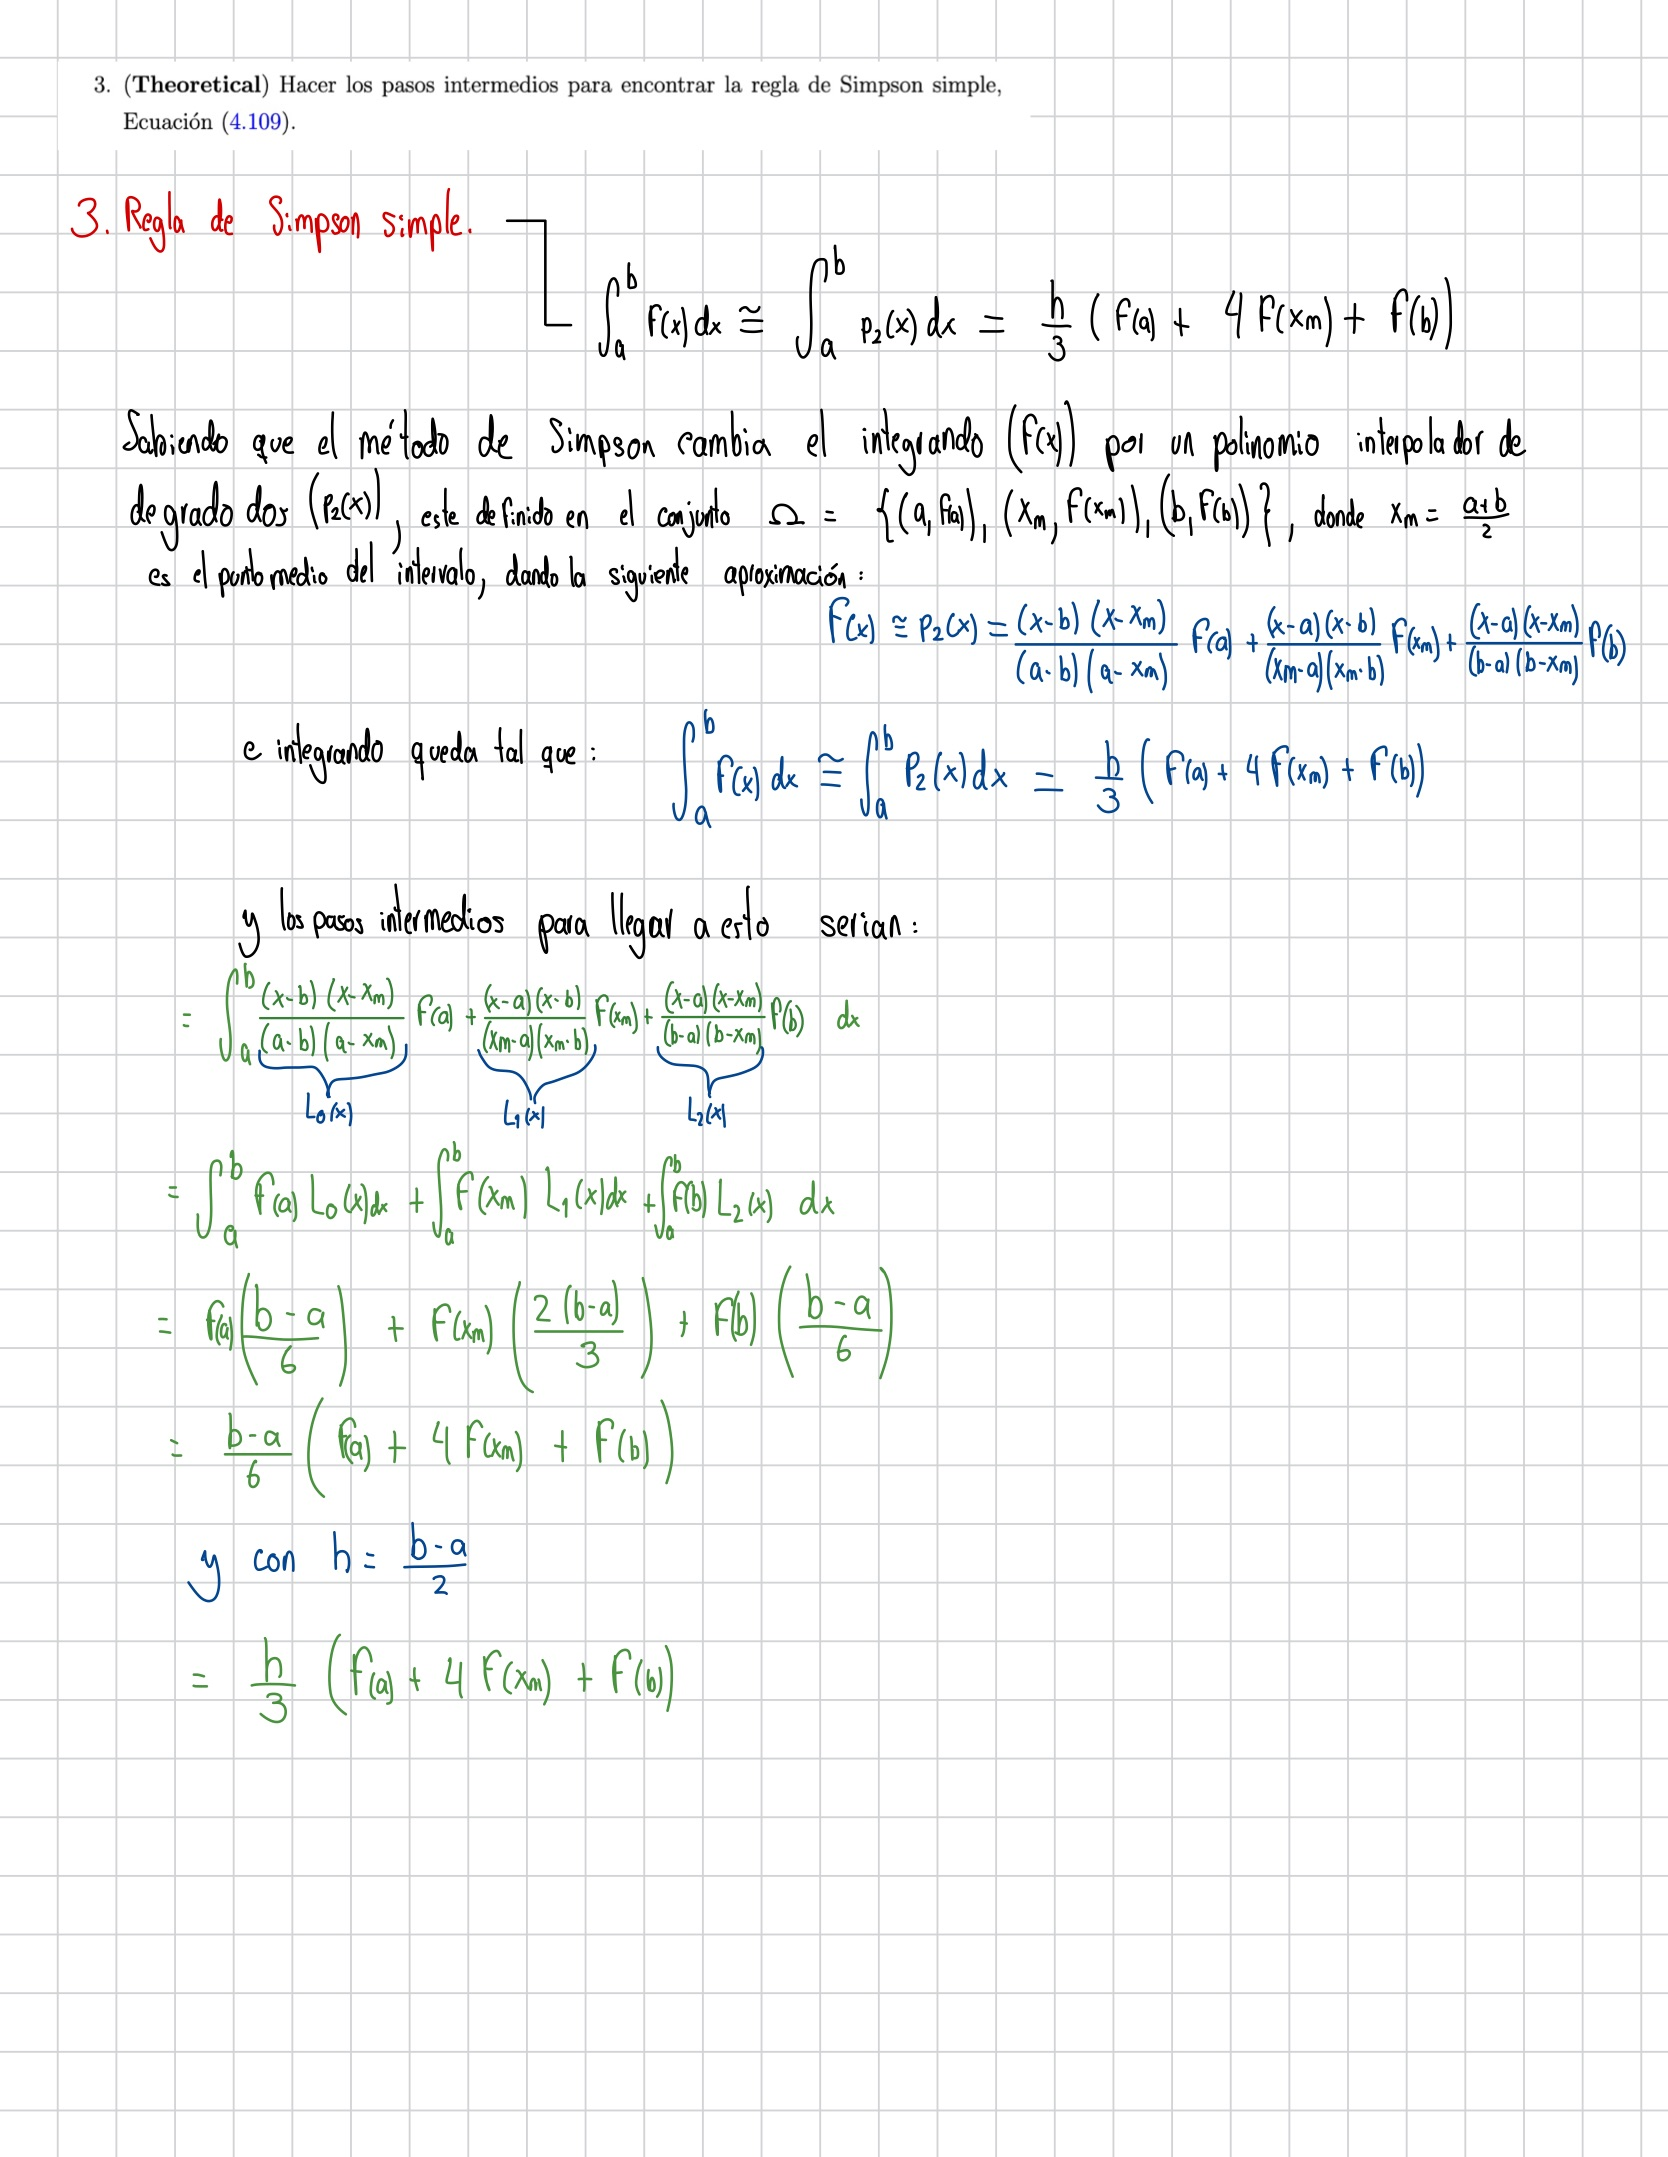

5. Resolver la siguiente integral con el m ́etodo del trapecio: $$\int_{0}^{1} e^{-x^2}dx$$ usando la condicion que el error debe ser menor a 0.005 en el calculo (si el numero depuntos (n) es decimal tomar el mayor entero).

In [7]:
def f(x):
    return np.exp(-x**2)

a = 0
b = 1
n = 4
h = (b - a) / n

x = np.linspace(a, b, n+1)
y = f(x)

integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

print(f"El valor aproximado de la integral es: {integral:.5f}")

El valor aproximado de la integral es: 0.74298


6. Para  encontrar  la  inductancia  exacta  de  una  bobina  toroidal  es  necesario  calcular  laintegral: $$\int_{-a}^{a} \frac{\sqrt{a^2-x^2}}{R
+x} dx = π (R−\sqrt{R^2−a^2})$$ donde R=  0.5cm es  el  radio  al  centro  del  toriode  y a=  0.01 cm es  el  radio  de  la seccion transversal del toriode.  Estimar la integral con el metodo del trapecio y la reglade Simpson 1/3, con un error menor al 0.5%.  Realizar la integral es un verdadero reto analitico.

In [10]:
def integrando(x, R, a):
    return np.sqrt(a**2 - x**2) / (R + x)

R = 0.5
a = 0.01
error = 0.005

def trapecio(f, a, b, n, R, a_param):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x, R, a_param)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def simpson(f, a, b, n, R, a_param):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x, R, a_param)
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return integral

n_trapecio = 4
integral_trapecio = trapecio(integrand, -a, a, n_trapecio, R, a)
print(f"Integral aproximada con el método del trapecio: {integral_trapecio:.5f}")

n_simpson = 4
integral_simpson = simpson(integrand, -a, a, n_simpson, R, a)
print(f"Integral aproximada con la regla de Simpson 1/3: {integral_simpson:.5f}")

Integral aproximada con el método del trapecio: 0.00027
Integral aproximada con la regla de Simpson 1/3: 0.00030


7. Una forma de generalizar el metodo de integracion del trapecio para una integral doblede una funcion $$f(x,y)$$ consiste en dividir el plano xy en un grilla de cuadrados iguales y calcular el promedio del valor de la funcion de cada uno de los 4 vertices de cada cuadrado pequeño de la grilla. Calcule numericamente el volumen de una semiesfera de radio R= 1 como sigue:

a)  Cree una grilla entre −R y R en el plano xy, donde el numero de cuadrados en cada lado  de  la  grilla  sea n. Es  decir, la  grilla  tendria n+ 1  puntos  en  cada  eje,  y $$n^2$$ cuadrados pequeños.

b) Para cada cuadrado pequeño calculo el promedio de la funcion en los cuatro vertices y multiplique por el area del cuadrado pequeño.  Si el punto queda fuera de la esfera asuma que el valor de la funcion f(x,y) es cero.

In [5]:
R = 1
n = 100
h = 2 * R / n

# Grilla en el rango [-R, R]
x = np.linspace(-R, R, n + 1)
y = np.linspace(-R, R, n + 1)

volumen = 0

def f(x, y):
    if x**2 + y**2 <= 1:
        val = 1 - x**2 - y**2
        return np.sqrt(val) if val >= 0 else 0
    else:
        return 0

volumen = 0

for i in range(n):
    for j in range(n):
        f1 = f(x[i], y[j])
        f2 = f(x[i + 1], y[j])
        f3 = f(x[i], y[j + 1])
        f4 = f(x[i + 1], y[j + 1])

        # Promedio de los valores de la función en los vértices
        prom = (f1 + f2 + f3 + f4) / 4


        volumen += prom * h**2

volumen


2.0938469983337344

9. (Sympy) La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomio interpolador de orden 3.

a)  Encontrar  las  funciones  cardinales  de  dicha  interpolacion  e  integrar  para  demostrar que: $$\int_{a}^{b} f(x) ~= \frac{3h}{8}[f(a)+3f(\frac{2a+b}{3})+3f(\frac{a+2b}{3})+f(b)]$$
El numero de puntos de la dsicretizacion debe ser multiplo de 3. Use la discretizacion {0, h, 2h, 3h}


b) Dado que h = (b-a)/3, muestre que los puntos intermedios son $$\frac{2a+b}{3} y \frac{a+2b}{3}$$ respectivamente.

In [15]:
x, a, b = sym.symbols('x a b')

h = (b - a) / 3
x_0 = a
x_1 = a + h
x_2 = a + 2*h
x_3 = a + 3*h

L_0 = ((x - x_1)*(x - x_2)*(x - x_3)) / ((x_0 - x_1)*(x_0 - x_2)*(x_0 - x_3))
L_1 = ((x - x_0)*(x - x_2)*(x - x_3)) / ((x_1 - x_0)*(x_1 - x_2)*(x_1 - x_3))
L_2 = ((x - x_0)*(x - x_1)*(x - x_3)) / ((x_2 - x_0)*(x_2 - x_1)*(x_2 - x_3))
L_3 = ((x - x_0)*(x - x_1)*(x - x_2)) / ((x_3 - x_0)*(x_3 - x_1)*(x_3 - x_2))

Int_L_0 = sym.integrate(L_0, (x, a, b))
Int_L_1 = sym.integrate(L_1, (x, a, b))
Int_L_2 = sym.integrate(L_2, (x, a, b))
Int_L_3 = sym.integrate(L_3, (x, a, b))

Int_L_0, Int_L_1, Int_L_2, Int_L_3


(-9*a**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) - a**3*(-3*a - 6*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - a**2*(2*a**2 + 14*a*b + 11*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) - a*(-2*a**2*b - 5*a*b**2 - 2*b**3)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + 9*b**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) + b**3*(-3*a - 6*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + b**2*(2*a**2 + 14*a*b + 11*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) + b*(-2*a**2*b - 5*a*b**2 - 2*b**3)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3),
 27*a**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) - a**3*(12*a + 15*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - a**2*(-9*a**2 - 54*a*b - 18*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) - a*(9*a**2*b + 18*a*b**2)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - 27*b**4/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) + b**3*(12*a + 15*b)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) + b**2*(-9*a**2 - 54*a*b - 18*b**2)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) + b*(9*a**2*b + 18*a*b*

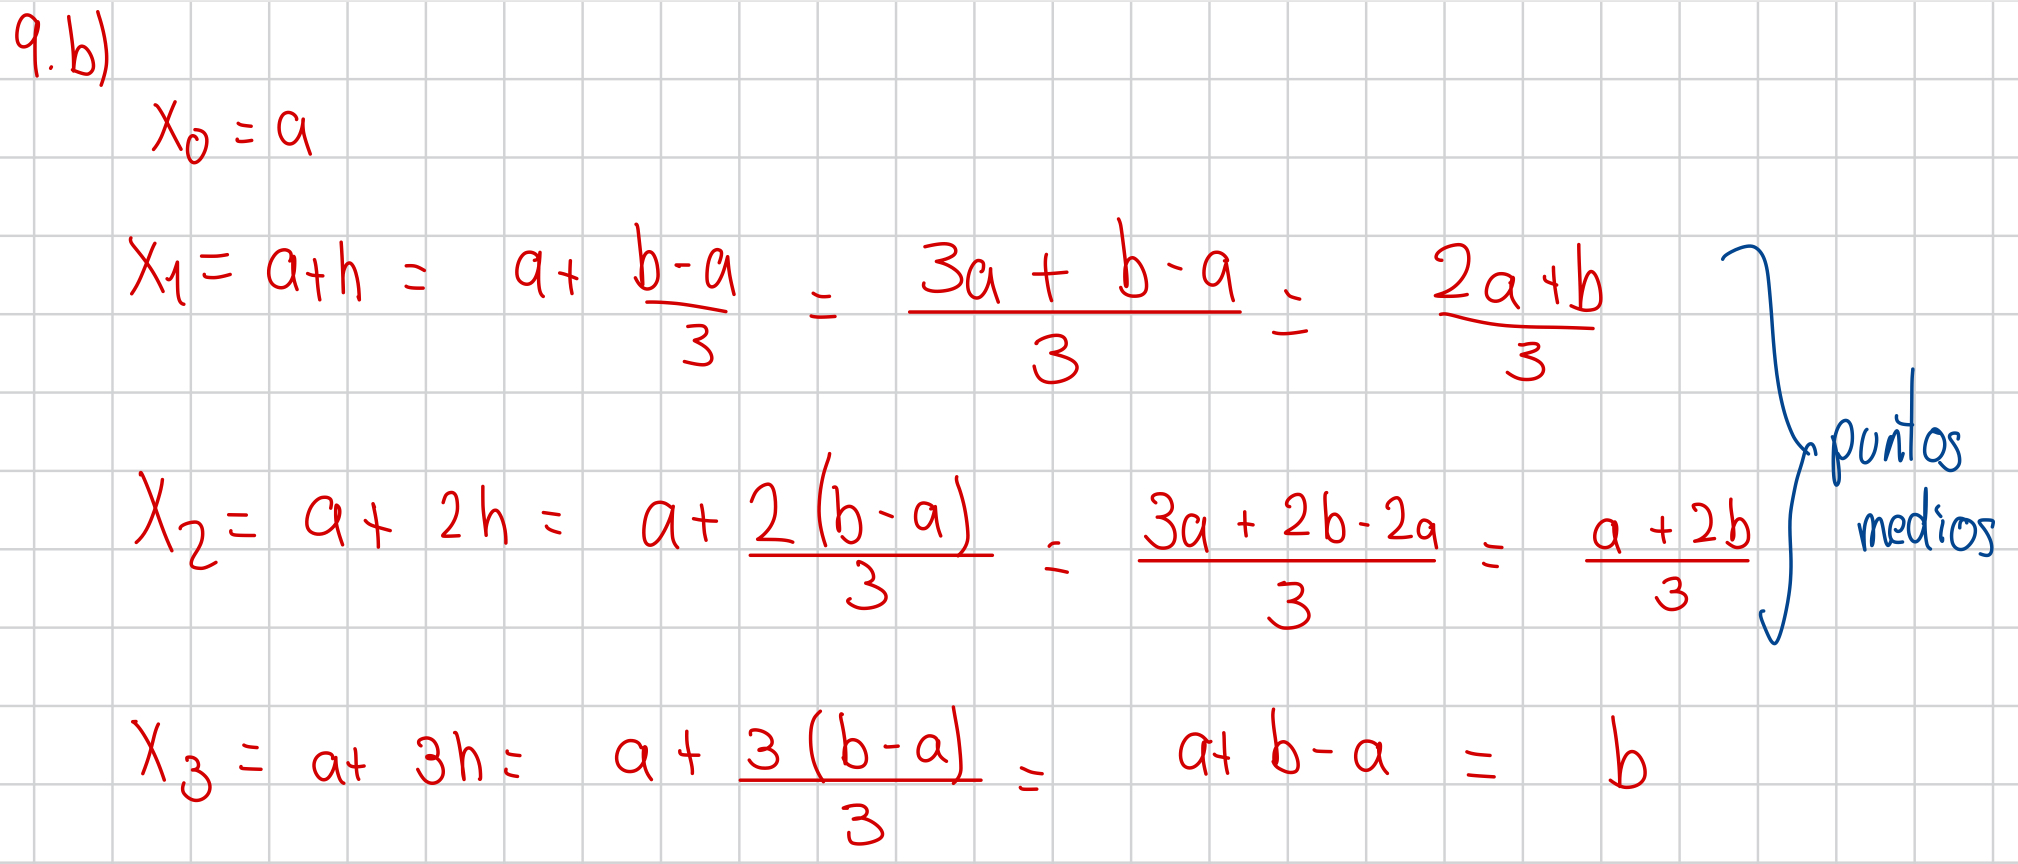